In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import tqdm

In [73]:
base_df = pd.read_csv("../data/output_files/final_base_df.csv")


In [105]:
varient_list = list(set(base_df["varient"]))

In [ ]:
changed_peptides = []
for i, row in tqdm.tqdm(base_df.iterrows(), total=len(base_df)):
    try:
        tmp = list(base_df[(base_df["varient"] == "original")&(base_df["start_pos"] == row["start_pos"])&(base_df["end_pos"] == row["end_pos"])]["peptide"])[0]
    except:
        print("no peptide")
        tmp = ""
    if(row["peptide"] != tmp):
        changed_peptides.append(row["peptide"])
        changed_peptides.append(tmp)
print(changed_peptides) 

In [107]:
filtered_df = base_df[base_df.peptide.isin(changed_peptides)]

2982
630


# Chopped analysis

number of chopped by varient

In [108]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Chopped"] == True)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Chopped"] == False)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'AY.4.2': {'chopped': 53, 'not chopped': 160}, 'Omicron BA.1': {'chopped': 53, 'not chopped': 160}, 'C.1.2': {'chopped': 50, 'not chopped': 163}, 'Gamma P.1': {'chopped': 53, 'not chopped': 160}, 'Eta B.1.525': {'chopped': 50, 'not chopped': 163}, 'Lambda C.37': {'chopped': 48, 'not chopped': 165}, 'Kappa B.1.617.1': {'chopped': 53, 'not chopped': 160}, 'Delta B.1.617.2': {'chopped': 53, 'not chopped': 160}, 'Omicron BA.2': {'chopped': 50, 'not chopped': 163}, 'Beta B.1.351': {'chopped': 50, 'not chopped': 163}, 'Alpha B.1.1.7': {'chopped': 55, 'not chopped': 158}, 'Iota B.1.526': {'chopped': 50, 'not chopped': 163}, 'original': {'chopped': 54, 'not chopped': 159}, 'Mu B.1.621': {'chopped': 50, 'not chopped': 163}}


In [109]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, True, varient_chopped_counter[var]["chopped"]])
    rows.append([var, False, varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

Exception ignored in: <function tqdm.__del__ at 0x0000023E67E73910>
Traceback (most recent call last):
  File "C:\Users\itayb\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\std.py", line 1147, in __del__
    self.close()
  File "C:\Users\itayb\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


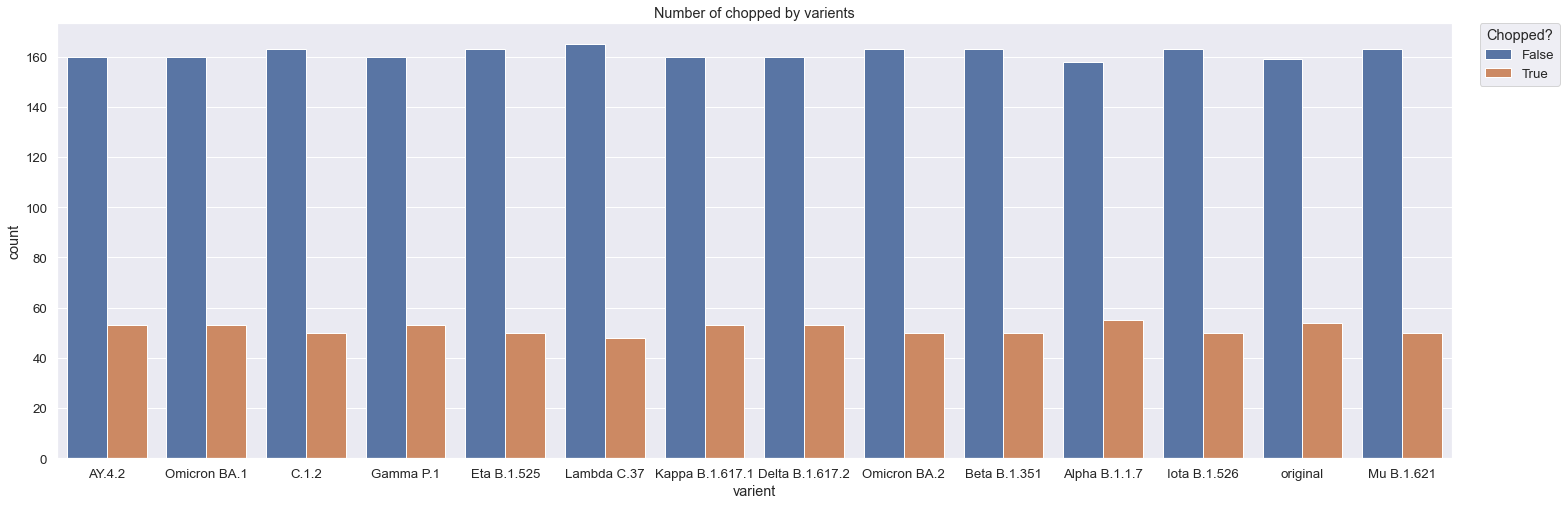

In [110]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)
ax.set_title('Number of chopped by varients')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Chopped?")
plt.savefig("plots/chopped-varient.png", dpi=500, bbox_inches='tight')


% of chopped by original

In [118]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["original"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["original"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, True, 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, False,100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

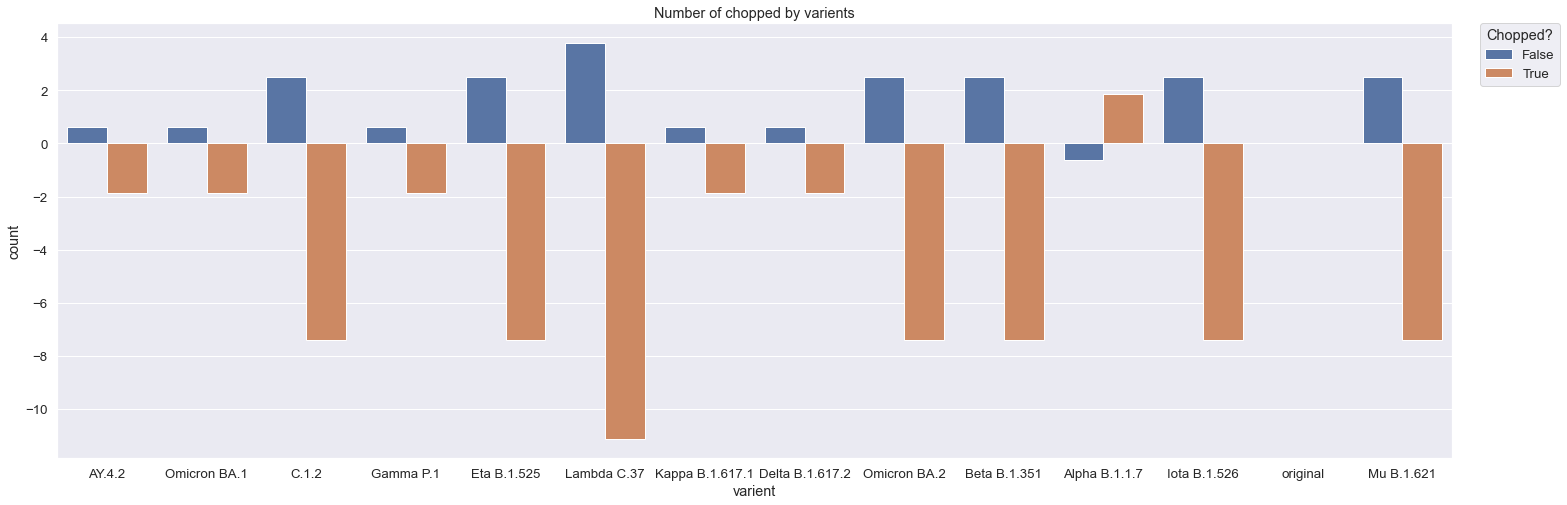

In [122]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of value changes comapre to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Chopped?")
plt.savefig("plots/chopped-varient.png", dpi=500, bbox_inches='tight')
